In [62]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

here random.seed is used to select the random variables but also allows to geneate the pseudo numbers
https://www.geeksforgeeks.org/random-seed-in-python/<br>
random.randrenge= it is use to generate random numbers in given range.https://www.geeksforgeeks.org/randrange-in-python/<br>


In [63]:
X = load_boston().data
Y = load_boston().target

In [64]:
print(X.data.shape)

(506, 13)


In [65]:
bos=load_boston()

In [66]:
scalar=preprocessing.StandardScaler()


In [67]:
bos_data = pd.DataFrame(X)


In [68]:
print(bos_data.head(2))

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   

      11    12  
0  396.9  4.98  
1  396.9  9.14  


In [69]:
bos_data.columns=bos.feature_names

In [70]:

bos_data.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(bos_data,Y,test_size=0.33,random_state=6)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [72]:
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)


<h1>SGD implementation</h1>

<b>for alpha=0.0001 and n_iter=100 and eta=0.01<br>
alpha:- Constant that multiplies the regularization term. Defaults to 0.0001<br>
n_iter:- Number of iterations with no improvement to wait before early stopping.<br>
eta :- learning_rate https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
<b>

In [73]:
clf = SGDRegressor(alpha=0.0001,n_iter=100,eta0=0.01)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
error_100=mean_squared_error(y_test, y_pred)


In [74]:
len(y_pred)


167

In [75]:
clf.coef_

array([-0.67353138,  1.00906307, -0.39529184,  0.68965646, -1.60403935,
        2.512192  , -0.11455185, -3.32068395,  2.48393562, -2.21086678,
       -2.06262158,  0.80339546, -3.64812588])

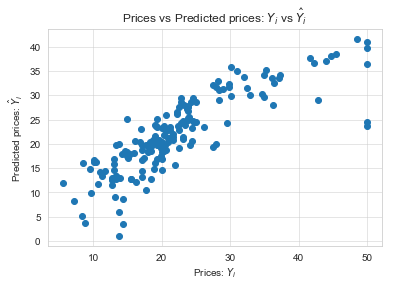

In [76]:
plt.scatter(y_test,y_pred)
plt.title('Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$')
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predicted prices: $\hat{Y}_i$')
plt.grid(b=True, linewidth=0.5)
plt.show()


<h1>Observation</h1><br>
here if we observe most of the predicted values are classified correctly except for some

In [77]:
print(error_100)


26.559811102303776


In [78]:
clf = SGDRegressor(alpha=0.0001,n_iter=1000,eta0=0.01)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
error1=mean_squared_error(y_test, y_pred)


In [79]:
clf.coef_

array([-0.69706879,  1.03008371, -0.33212724,  0.658742  , -1.63259497,
        2.48672733, -0.10527   , -3.32606922,  2.69475822, -2.46635281,
       -2.08147751,  0.80755877, -3.6687049 ])

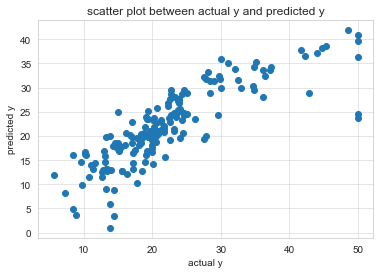

In [80]:
plt.scatter(y_test,y_pred)
plt.title('scatter plot between actual y and predicted y')
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.grid(b=True, linewidth=0.5)


In [81]:
print(error1)


26.61593870536933


<h1>observation</h1><br>
here if we observe the mean square error for both the iteration of n=100 and n=1000 the error are approximately same

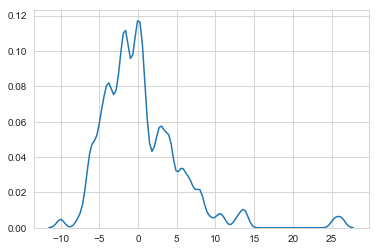

In [82]:
delta_y = y_test - y_pred;
import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

<h1>KDE Plot</h1><br>
KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable. We can also plot a single graph for multiple samples which helps in more efficient data visualization<br>


https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/

In [83]:
weight_actual=clf.coef_
weight_actual=list(weight_actual)
weight_actual[0:5]

[-0.6970687928714746,
 1.0300837143176012,
 -0.33212723783118325,
 0.6587419981186021,
 -1.632594967873297]

In [84]:
manual_train=pd.DataFrame(data=X_train)
manual_train['price']=y_train


In [85]:
# this function is a simple implementation of sgd to linear regression, here we didn't use any regularization
# we need to provide the pandas data with price, initial learning rate , and learning rate variation, number of iteration
# here we have implemented constant learning rate and invscaling learning rate
# checking the significant difference in loss i.e stopping condition might take lots of time so here we fix the number of loop 
# this function returns weight (w) and bias (b)
# here we have taken sgd with batch size=10
def manual_fit(X, lr_rate_variation, alpha=0.0001, lr_rate=0.01, power_t=0.25, n_iter=100):
    w_new=np.zeros(shape=(1,13))
    b_new=0
    t=1
    r=lr_rate
    
    while(t<=n_iter):
        w_old=w_new
        b_old=b_new
        w_=np.zeros(shape=(1,13))
        b_=0
        x_data=X.sample(10)
        x=np.array(x_data.drop('price',axis=1))
        y=np.array(x_data['price'])
        
        
        for i in range(10):  # for getting the derivatives using sgd with k=10
            y_curr=np.dot(w_old,x[i])+b_old
            w_+=x[i] * (y[i] - y_curr)
            b_+=(y[i]-y_curr)
            
            
        w_*=(-2/x.shape[0])
        b_*=(-2/x.shape[0])
        
        #updating the parameters
        w_new=(w_old-r*w_)
        b_new=(b_old-r*b_)
        
        
        if(lr_rate_variation=='invscaling'):
            r = lr_rate / pow(t, power_t)
        t+=1
        
    return w_new, b_new




In [86]:
w,b=manual_fit(X=manual_train, lr_rate_variation='constant' , n_iter=1000)
b


array([22.56839996])

In [87]:
def pred(x,w, b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

In [88]:
y_pred_manual=pred(np.array(X_test),w,b)
y_pred_manual=list(y_pred_manual)
y_pred_manual[0:5]



[25.894220869787798,
 23.56317766595423,
 29.35916645921575,
 24.130053907631314,
 18.43763819717614]

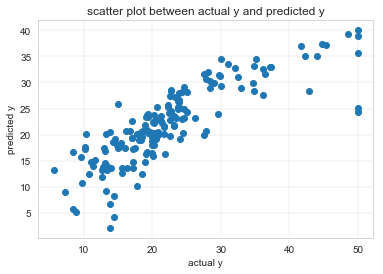

**************************************************************


In [89]:
plt.scatter(y_test,y_pred_manual)
plt.grid(b=True, linewidth=0.3)
plt.title('scatter plot between actual y and predicted y')
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.show()
print('**************************************************************')


In [90]:
mean_error=[]
for i in range(len(y_test)):
    mean_error.append((y_test[i]-y_pred_manual[i]))


In [91]:
sum1=0
for i in range(len(mean_error)):
    sum1=sum1+((mean_error[i])**2)
final_error=(sum1)/len(mean_error)
final_error



27.364739019073028

In [92]:
data = pd.DataFrame({'y_manual_diff':mean_error, 'y_sklearn_diff':delta_y} )
data.head(2)

,y_manual_diff,y_sklearn_diff
0,-10.894221,-10.003748
1,-0.463178,-1.571514


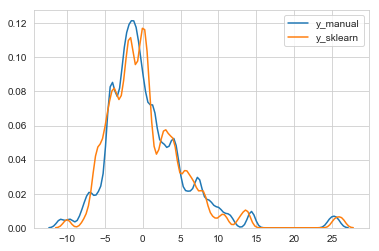

In [93]:
import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(data['y_manual_diff']), bw=0.5,label='y_manual')
sns.kdeplot(np.array(data['y_sklearn_diff']),bw=0.5,label='y_sklearn')
plt.show()


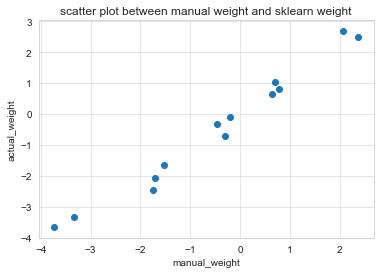

-----------------------------------------------------


In [94]:
plt.scatter(w,weight_actual)
plt.title('scatter plot between manual weight and sklearn weight')
plt.xlabel('manual_weight')
plt.ylabel('actual_weight')
plt.grid(b=True, linewidth=0.5)
plt.show()
print('-----------------------------------------------------')


<b>from below example we will understand that for higher n_iter our both manual and
sklearn SGDReggressor error is almost same but for lower iteration there is diff<b>


In [95]:
w_100,b_100=manual_fit(X=manual_train, lr_rate_variation='constant' , n_iter=100)
b_100


array([19.57536565])

In [96]:
def pred(x,w_100, b_100):
    y_pred_100=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w_100,x[i])+b_100)
        y_pred_100.append(y)
    return np.array(y_pred_100)


In [97]:
y_pred_manual_100=pred(np.array(X_test),w_100,b_100)

In [98]:
y_pred_manual_100=list(y_pred_manual_100)


In [99]:
y_pred_manual_100[0:5]


[20.10044664344312,
 25.10097969486798,
 24.470563710089845,
 20.91807391503877,
 19.733796406816914]

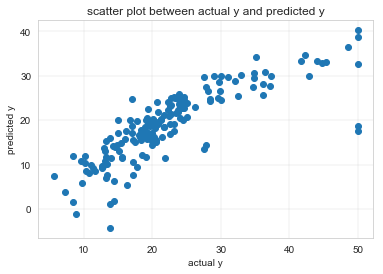

In [100]:
plt.scatter(y_test,y_pred_manual_100)
plt.grid(b=True, linewidth=0.3)
plt.title('scatter plot between actual y and predicted y')
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.show()

In [101]:
mean_error=[]
for i in range(len(y_test)):
    mean_error.append((y_test[i]-y_pred_manual_100[i]))

In [102]:
for i in range(len(mean_error)):
    sum1=sum1+((mean_error[i])**2)
final_error_100=(sum1)/len(mean_error)

In [103]:
final_error_100


67.39769781108004

In [104]:
data = pd.DataFrame({'y_manual_diff':mean_error, 'y_sklearn_diff':delta_y} )
data.head(2)

,y_manual_diff,y_sklearn_diff
0,-5.100447,-10.003748
1,-2.000980,-1.571514


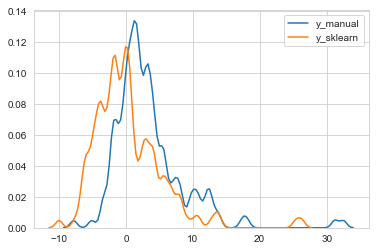

In [105]:
import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(data['y_manual_diff']), bw=0.5,label='y_manual')
sns.kdeplot(np.array(data['y_sklearn_diff']),bw=0.5,label='y_sklearn')
plt.show()

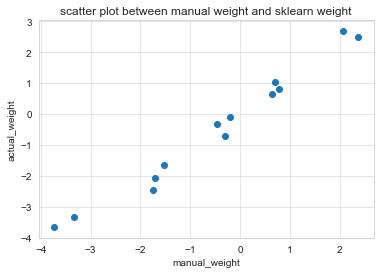

In [106]:
plt.scatter(w,weight_actual)
plt.title('scatter plot between manual weight and sklearn weight')
plt.xlabel('manual_weight')
plt.ylabel('actual_weight')
plt.grid(b=True, linewidth=0.5)
plt.show()


<h1>Conclusion</h1>

In [107]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names=['Weight vector manual','Weight vector SGD sklearn']
for i in range(13):
    x.add_row([w[0][i],weight_actual[i]])
print(x)

+----------------------+---------------------------+
| Weight vector manual | Weight vector SGD sklearn |
+----------------------+---------------------------+
| -0.3107772194891865  |    -0.6970687928714746    |
|  0.7030868055268868  |     1.0300837143176012    |
| -0.4621266065118765  |    -0.33212723783118325   |
|  0.6523008858644584  |     0.6587419981186021    |
| -1.5239440145440135  |     -1.632594967873297    |
|  2.3684104079032626  |      2.48672733278463     |
| -0.20107374859309163 |    -0.10526999952084692   |
|  -3.342811674943373  |    -3.3260692182772753    |
|  2.0672116572676957  |     2.6947582209516723    |
| -1.7404223369344072  |    -2.4663528069706815    |
| -1.7071157685179685  |    -2.0814775105226286    |
|  0.7784884402725494  |     0.8075587749441345    |
| -3.7295236912196343  |     -3.668704899652102    |
+----------------------+---------------------------+
